# Set Up

In [1]:
%run SetUp.ipynb

Home Directory = /home/cjpar/Work/wfe/wfey
Log Path = /home/cjpar/Work/wfe/wfey/logs/logs/


## Loading DataFrames

In [2]:
bm_output = pd.read_pickle(HOME_DIRECTORY+'/'+DF+'/'+LOGS+'_output.pkl')
bm_output_raw = pd.read_pickle(HOME_DIRECTORY+'/'+DF+'/'+LOGS+'_output_raw.pkl')

bm_output_clean = pd.read_pickle(HOME_DIRECTORY+'/'+DF+'/'+LOGS+'_output_clean.pkl')
bm_output_clean_raw = pd.read_pickle(HOME_DIRECTORY+'/'+DF+'/'+LOGS+'_output_clean_raw.pkl')

import re ## TODO add too setup
cols = bm_output_clean_raw.columns

r = re.compile("energy.*_input")
energy_cols = list(filter(r.match, cols))
print("Energy Cols: ", energy_cols)

bm_start_index = list(cols).index("epThread")
bm_cols = list(cols[bm_start_index:])
print("BM Cols: ", bm_cols)

bm_output_flat = bm_output.explode(energy_cols +["time"], ignore_index=True)
bm_output_flat_raw = bm_output_clean_raw.explode(energy_cols +["time"], ignore_index=True)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(bm_output_flat_raw)

Energy Cols:  ['energy1_input', 'energy2_input', 'energy3_input', 'energy4_input', 'energy5_input', 'energy6_input', 'energy7_input', 'energy8_input', 'energy9_input', 'energy10_input', 'energy11_input', 'energy12_input', 'energy13_input', 'energy14_input', 'energy15_input', 'energy16_input', 'energy17_input', 'energy18_input', 'energy19_input', 'energy20_input', 'energy21_input', 'energy22_input', 'energy23_input', 'energy24_input', 'energy25_input', 'energy26_input', 'energy27_input', 'energy28_input', 'energy29_input', 'energy30_input', 'energy31_input', 'energy32_input', 'energy33_input', 'energy34_input', 'energy35_input', 'energy36_input', 'energy37_input', 'energy38_input', 'energy39_input', 'energy40_input', 'energy41_input', 'energy42_input', 'energy43_input', 'energy44_input', 'energy45_input', 'energy46_input', 'energy47_input', 'energy48_input', 'energy49_input', 'energy50_input', 'energy51_input', 'energy52_input', 'energy53_input', 'energy54_input', 'energy55_input', 'ene

## Graph Set-Up

In [3]:
sns.set_palette("Paired")
pd.options.mode.chained_assignment = None

#eventsubset=[10, 100]
eventsubset=[50000, 100000, 150000]
sourceCPUsubset=["1", "10", "50"]

def return_df(df):
    return df[ (df['eventrate'].isin(eventsubset)) & (df['sourceCPUs'].isin(sourceCPUsubset))].copy()

def return_config_set(df, event, scpu):
    return ( df[ (df['eventrate'] == event) & (df['sourceCPUs'] == scpu)] )

df_used = return_df(bm_output)

# Graphs -- Overview

## Heat Map

['eventrate', 'eventprocCPUs', 'sourceCPUs', 'latency_min', 'latency_max', 'latency_mean', 'energy1_input']


<Axes: >

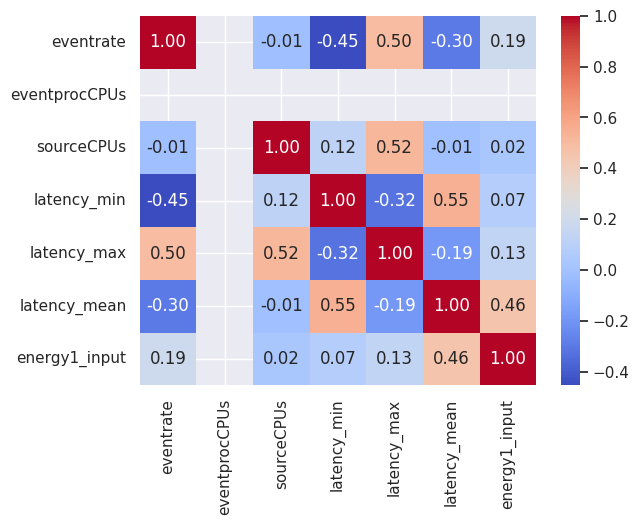

In [4]:
#sns.pairplot(data=bm_output_flat, hue="configs")
#corr = bm_output_flat_raw[['eventrate', 'eventprocCPUs', 'sourceCPUs', 'energy1_input', 'latency_min', 'latency_max', 'latency_mean']].corr()

common_cols = ['eventrate', 'eventprocCPUs', 'sourceCPUs', 'latency_min', 'latency_max', 'latency_mean']
output_cols = common_cols + ['energy1_input']
print(output_cols)
corr = bm_output_flat_raw[output_cols].corr()
#fig, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

In [5]:
## NOTE -- this is insane dont load this
common_cols = ['eventrate', 'eventprocCPUs', 'sourceCPUs', 'latency_min', 'latency_max', 'latency_mean']
output_cols = common_cols + energy_cols
print(output_cols)
corr = bm_output_flat_raw[output_cols].corr()
fig, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

['eventrate', 'eventprocCPUs', 'sourceCPUs', 'latency_min', 'latency_max', 'latency_mean', 'energy1_input', 'energy2_input', 'energy3_input', 'energy4_input', 'energy5_input', 'energy6_input', 'energy7_input', 'energy8_input', 'energy9_input', 'energy10_input', 'energy11_input', 'energy12_input', 'energy13_input', 'energy14_input', 'energy15_input', 'energy16_input', 'energy17_input', 'energy18_input', 'energy19_input', 'energy20_input', 'energy21_input', 'energy22_input', 'energy23_input', 'energy24_input', 'energy25_input', 'energy26_input', 'energy27_input', 'energy28_input', 'energy29_input', 'energy30_input', 'energy31_input', 'energy32_input', 'energy33_input', 'energy34_input', 'energy35_input', 'energy36_input', 'energy37_input', 'energy38_input', 'energy39_input', 'energy40_input', 'energy41_input', 'energy42_input', 'energy43_input', 'energy44_input', 'energy45_input', 'energy46_input', 'energy47_input', 'energy48_input', 'energy49_input', 'energy50_input', 'energy51_input', 

<Axes: >

['eventrate', 'eventprocCPUs', 'sourceCPUs', 'latency_min', 'latency_max', 'latency_mean', 'epThread', 'ID', 'Total Wakeups', 'Spurious Wakeups', 'Events', 'Active Cycles', 'Inactive Cycles', 'Cycle Diff', 'CPU Cycles', 'Instructions Retired']


<Axes: >

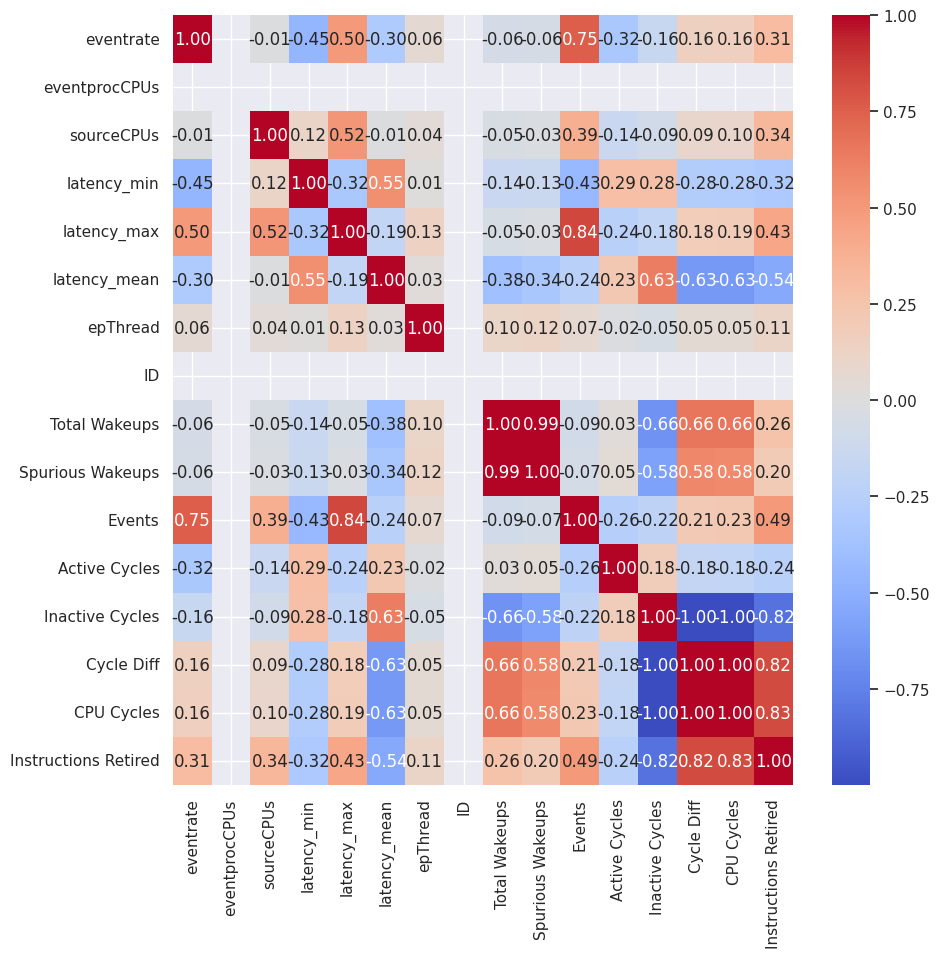

In [6]:
## NOTE: if you want benchmark you need to flatten benchmark data
bm_output_flat_raw_cols = bm_output_clean_raw.explode(bm_cols, ignore_index=True)
output_cols = common_cols + bm_cols
print(output_cols)
corr = bm_output_flat_raw_cols[output_cols].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

## Correlations with the HW Monitor Numbers

### HWMON2

#### Power Graphs

##### Choosing subsets of plots

In [7]:
#eventsubset=[10, 100]
#eventsubset=[50000, 100000, 150000]
#sourceCPUsubset=["1", "10", "50"]

##### Power values over time -- Differentiated by EventRate

                               KEY             configs  eventrate  \
198   busypoll_nodb_wfey/50000_1_1  busypoll_nodb_wfey      50000   
199   busypoll_nodb_wfey/50000_1_1  busypoll_nodb_wfey      50000   
200   busypoll_nodb_wfey/50000_1_1  busypoll_nodb_wfey      50000   
201   busypoll_nodb_wfey/50000_1_1  busypoll_nodb_wfey      50000   
202   busypoll_nodb_wfey/50000_1_1  busypoll_nodb_wfey      50000   
...                            ...                 ...        ...   
7228   wfe_db_mon_wfey/150000_1_50     wfe_db_mon_wfey     150000   
7229   wfe_db_mon_wfey/150000_1_50     wfe_db_mon_wfey     150000   
7230   wfe_db_mon_wfey/150000_1_50     wfe_db_mon_wfey     150000   
7231   wfe_db_mon_wfey/150000_1_50     wfe_db_mon_wfey     150000   
7232   wfe_db_mon_wfey/150000_1_50     wfe_db_mon_wfey     150000   

     eventprocCPUs sourceCPUs  time  latency_min    latency_max  latency_mean  \
198              1          1   0.0  3520.000000   73320.000000   3574.000000   
199      

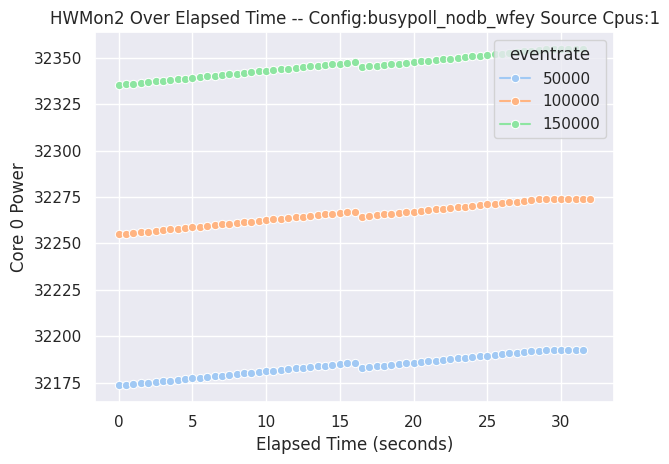

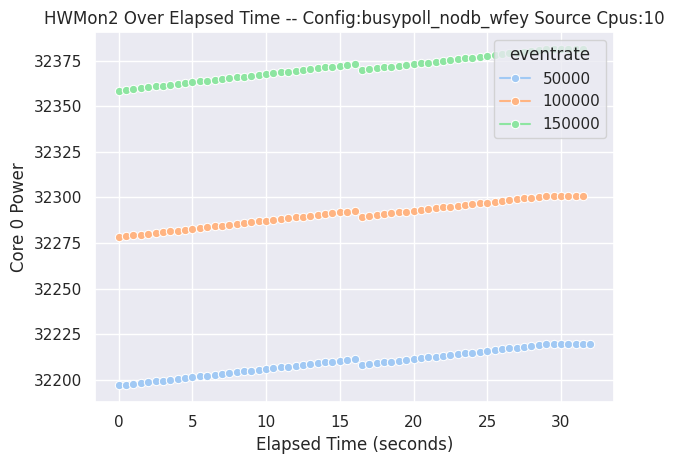

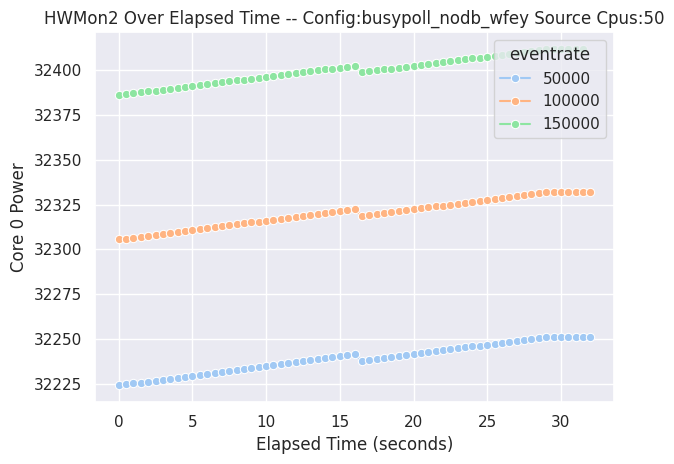

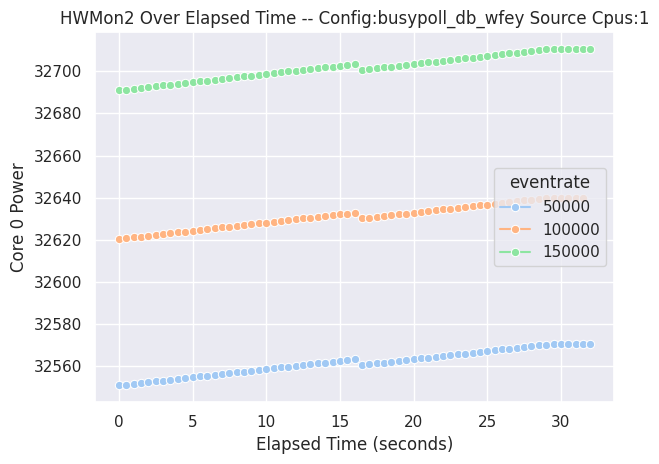

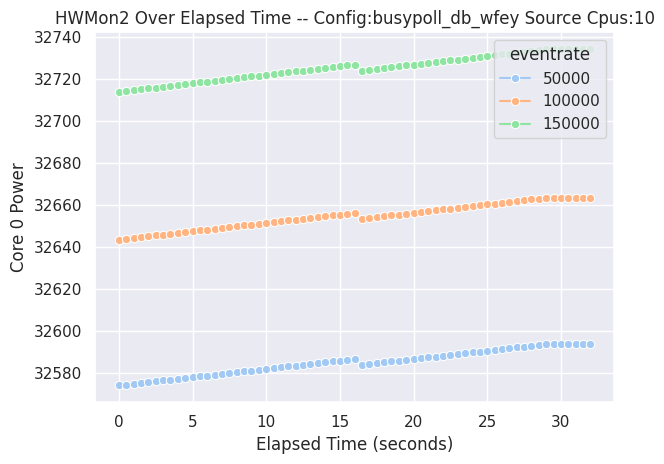

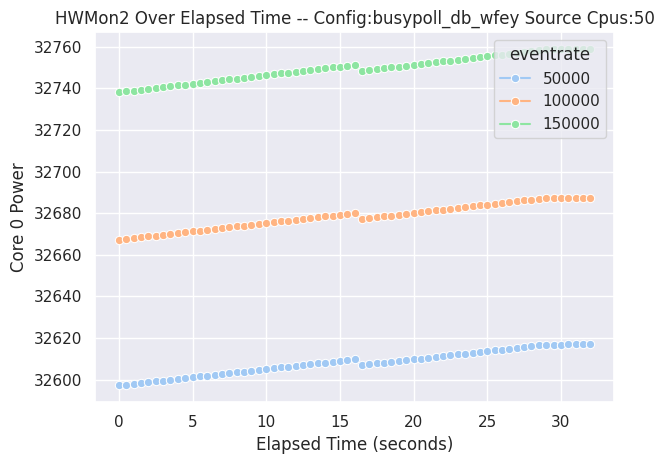

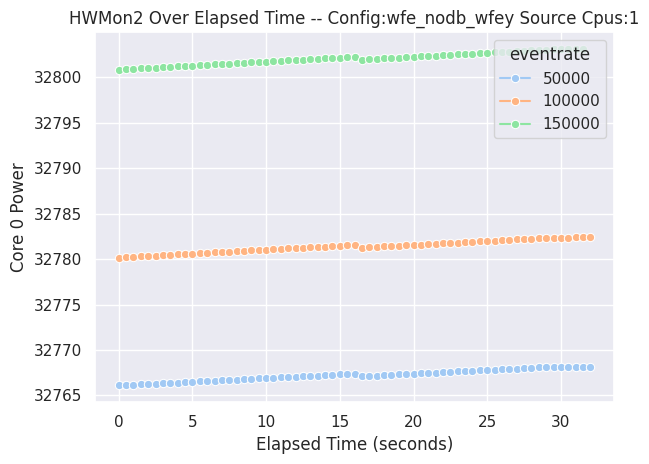

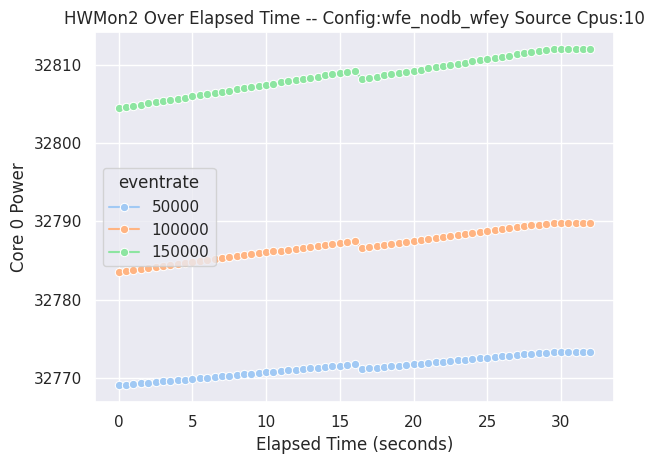

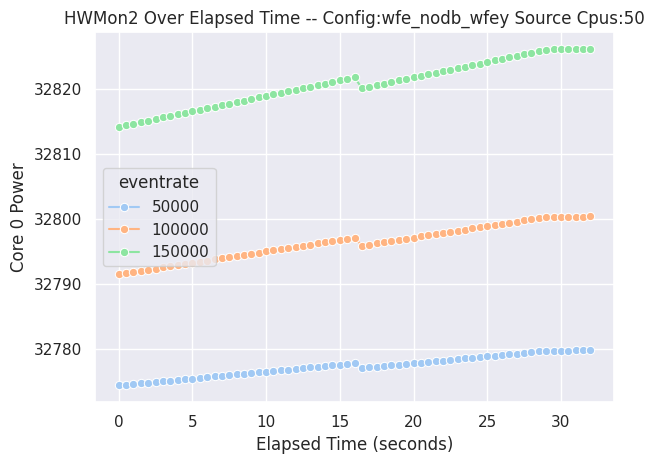

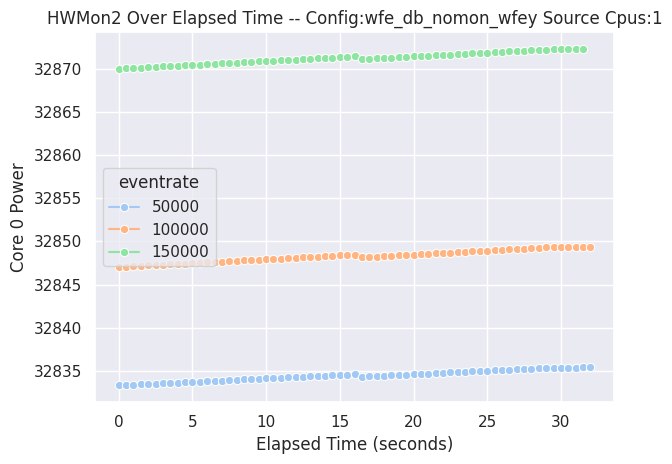

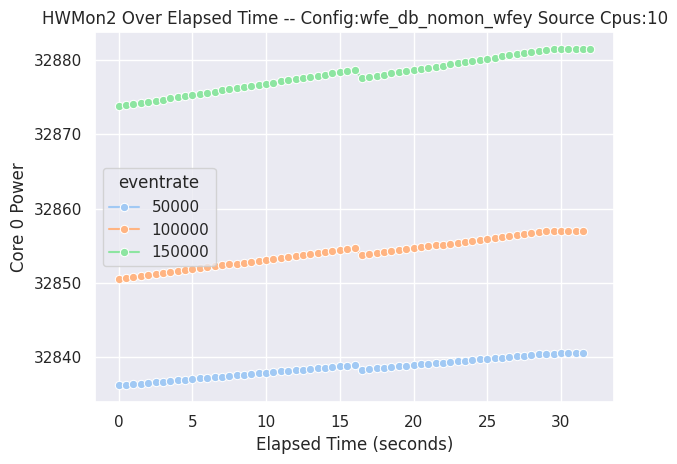

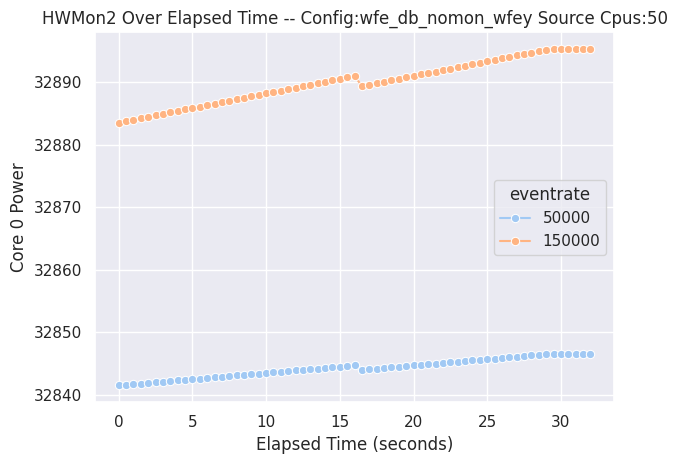

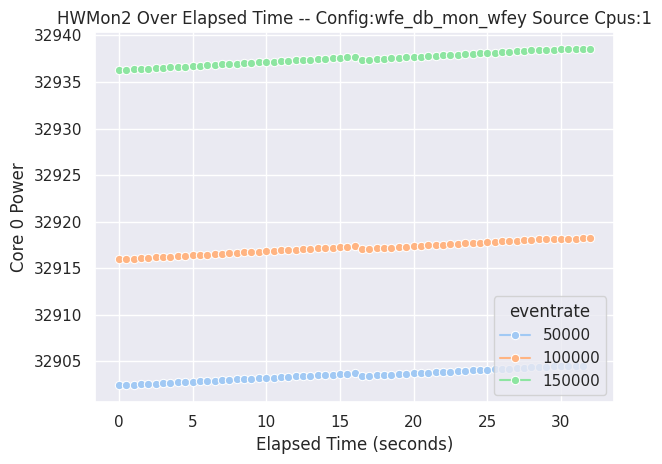

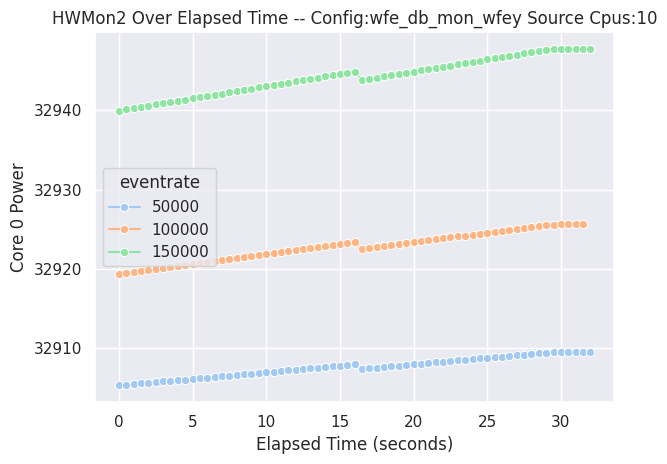

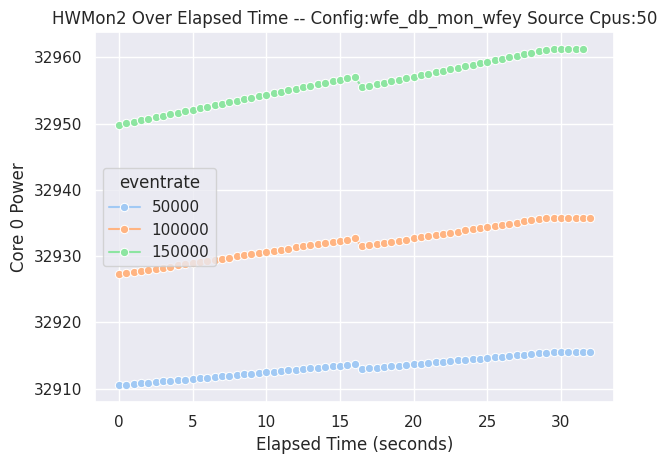

In [8]:
df_used = return_df(bm_output_flat_raw)
print(df_used)

config_set = None

for c in CONFIGS:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = df_used[ (df_used['configs'] == c) &
                                (df_used['sourceCPUs'] == sc)]

        print(config_set)
        sns.lineplot(
            data=config_set, 
            x='time',
            y='energy1_input',
            hue='eventrate',
            palette='pastel',
            marker='o', 
            errorbar=None
        )
        
        plt.title('HWMon2 Over Elapsed Time -- Config:'+c+' Source Cpus:'+sc)
        plt.xlabel('Elapsed Time (seconds)')
        plt.ylabel('Core 0 Power')
        #plt.ylim(df_used['hwmon2_min'].min(),df_used['hwmon2_max'].max())
        plt.tight_layout()

##### Power values over time -- Differentiated by Config

In [9]:
df_used = return_df(bm_output_flat_raw)
config_set = None

for e in eventsubset:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = return_config_set(df_used, e, sc)

        sns.lineplot(
        data=config_set, 
            x='time',
            y='hwmon2',
            hue='configs',
            marker='o',        
            errorbar=None
        )
    
        plt.title('HWMon2 Over Elapsed Time -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Elapsed Time (seconds)')
        plt.ylabel('HWMon2 Power')
        plt.ylim(df_used['hwmon2'].min(),df_used['hwmon2'].max())
        plt.tight_layout()

ValueError: Could not interpret value `hwmon2` for `y`. An entry with this name does not appear in `data`.

<Figure size 640x480 with 0 Axes>

##### Min/Max/Mean per Config

In [ ]:
df_used = return_df(bm_output_clean)
config_set = None

for e in eventsubset:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = return_config_set(df_used, e, sc)


        key = str(e)+"_"+str(sc)
        
        try:
            g = sns.catplot(
            data=config_set, 
            kind="bar",
            x='configs',
            y='hwmon2_mean',
            hue='configs',
            legend=True,
            errorbar=None
            )
        except Exception as exc:
            print(f"{key}: {exc.__class__.__name__}")
            continue

        sns.scatterplot(
        data=config_set,
        x='configs',
        y='hwmon2_min',
        hue='configs',
        legend=False
        )

        sns.scatterplot(
        data=config_set,
        x='configs',
        y='hwmon2_max',
        hue='configs',
        legend=False
        )

        #g.fig.get_axes()[0].set_yscale('log')
    
        plt.title('HWMon2 Mean -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Config')
        plt.ylabel('HWMon2 Power')
        plt.ylim(df_used['hwmon2_min'].min(),df_used['hwmon2_max'].max()) # use this to arg set per config
        #plt.ylim(config_set['hwmon2_min'].min(),config_set['hwmon2_max'].max()) # use this to compare the configs per arg set
        plt.tight_layout()

##### Power Differences

In [ ]:
df_used = return_df(bm_output_clean)
config_set = None

total_diff_set = df_used.assign( hwmon2_diff = df_used['hwmon2_max'] - df_used['hwmon2_min'] )

for e in eventsubset:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = return_config_set(df_used, e, sc)
        diff_set = config_set.assign( hwmon2_diff = config_set['hwmon2_max'] - config_set['hwmon2_min'] )

        sns.catplot(
            data=diff_set, 
            kind="bar",
            x='configs',
            y='hwmon2_diff',
            hue='configs',
            errorbar=None
        )
    
        plt.title('HWMon2 Over Elapsed Time -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Elapsed Time (seconds)')
        plt.ylabel('HWMon2 Power Diff')
        plt.ylim(0,total_diff_set['hwmon2_diff'].max())
        plt.tight_layout()

##### Total Watts Used

In [ ]:
df_used = return_df(bm_output_clean)

total_sum_set = df_used.assign( hwmon2_total = [sum(x) for x in df_used['hwmon2']] )


for e in eventsubset:
    for sc in sourceCPUsubset:
        config_set = None
        plt.figure()
        
        config_set = return_config_set(df_used, e, sc)

        if config_set.empty:
            key = str(e)+"_"+str(sc)
            print(key, "is empty! SKIPPING")
            continue

        sum_set = config_set.copy()
        sum_set['hwmon2_total'] =config_set['hwmon2'].apply(sum)

        sns.catplot(
            data=sum_set, 
            kind="bar",
            x='configs',
            y='hwmon2_total',
            hue='configs',
            errorbar=None
        )
        
        min_y = sum_set['hwmon2_total'].min()
        #min_y = total_sum_set['hwmon2_total'].min()
        max_y = sum_set['hwmon2_total'].max()
        #max_y = total_sum_set['hwmon2_total'].max()
        mindim = 10**(int(math.log10(min_y))-1)
        maxdim = 10**(int(math.log10(max_y))-1)

        plt.title('HWMon2 Total Wattage -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Configs')
        plt.ylabel('HWMon Wattage Total (uW)')
        plt.ylim(min_y-mindim, max_y+maxdim)
        #plt.tight_layout()
        #plt.figure(figsize=(6, 4))

#### Latency Graphs

##### Choosing subsets of plots

In [ ]:
#eventsubset=[10, 100]
#eventsubset=[50000, 100000, 150000]
#sourceCPUsubset=["1", "10", "50"]

df_used = return_df(bm_output_clean)

#### Average Latency Numbers across all arg configs for each wfey Config

In [ ]:
sns.violinplot(data=df_used, x='eventrate', y='latency_mean', hue='configs')
#print(df_used[ ( df_used['eventrate'] == 1000) & (df_used['configs'] == 'wfe_db_nomon_wfey')].loc[:, ['KEY', 'latency_mean']])

In [ ]:
sns.violinplot(data=df_used, x='eventrate', y='latency_min', hue='configs')

In [ ]:
sns.violinplot(data=df_used, x='eventrate', y='latency_max', hue='configs')

##### Min/Max/Mean per Config

In [ ]:
df_used = return_df(bm_output_clean)
config_set = None

for e in eventsubset:
    for sc in sourceCPUsubset:
        plt.figure()
        config_set = return_config_set(df_used, e, sc)

        key = str(e)+"_"+str(sc)
        try:
            g = sns.catplot(
            data=config_set, 
            kind="bar",
            x='configs',
            y='latency_mean',
            hue='configs',
            legend=True,
            errorbar=None
            )
        except Exception as exc:
            print(f"{key}: {exc.__class__.__name__}")
            continue

        sns.scatterplot(
        data=config_set,
        x='configs',
        y='latency_min',
        hue='configs',
        legend=False
        )

    
        plt.title('Latency Mean -- EventRate:'+str(e)+' Source Cpus:'+sc)
        plt.xlabel('Config')
        plt.ylabel('Latency(ns)')
        #plt.ylim(0,config_set['latency_mean'].max())
        plt.ylim(0,df_used['latency_mean'].max())
        plt.tight_layout()

### HWMON 3